#EMOTION DETECTION

**impporting libraries

**EXPLORING DATASET**

In [1]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
import tensorflow as tf



In [3]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model


from IPython.display import SVG, Image
import tensorflow as tf
print("tensorflow version:",tf.__version__)






tensorflow version: 2.16.2


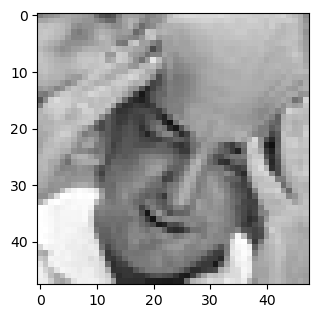

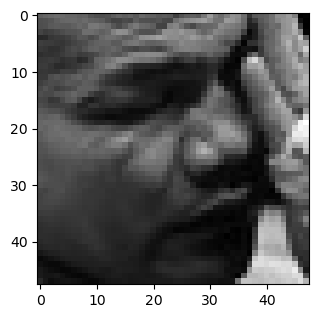

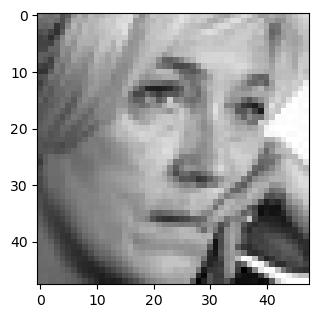

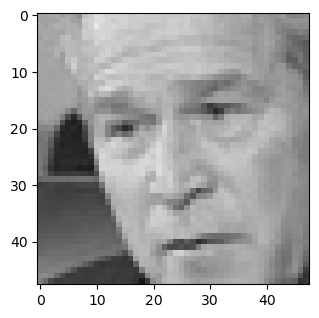

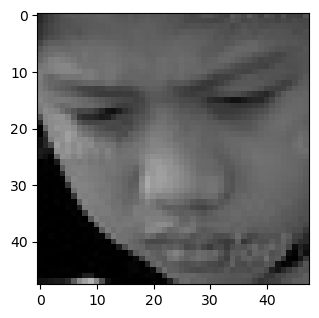

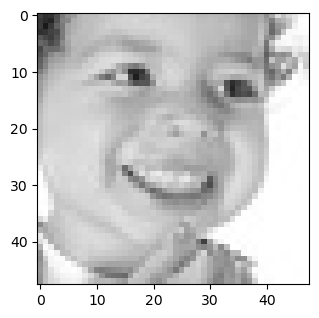

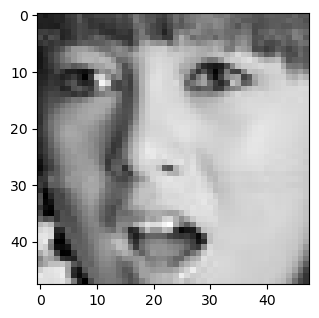

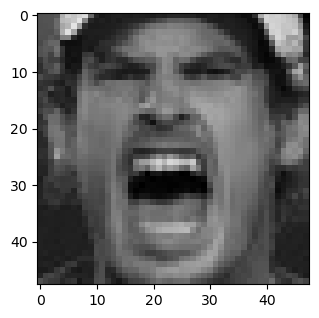

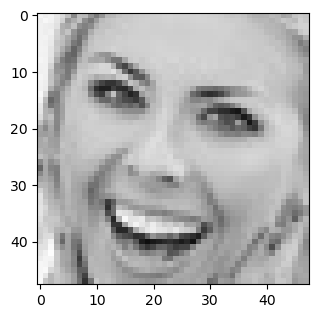

In [4]:
images = glob("train/**/**")
for i in range(9):
    image = random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image))
    

In [5]:
img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("train/",
                                                    target_size = (img_size,img_size),
                                                    color_mode = "grayscale",
                                                    batch_size = batch_size,
                                                    class_mode = "categorical",
                                                    shuffle = True)
datagen_validation = ImageDataGenerator()
validation_generator = datagen_train.flow_from_directory("test/",
                                                    target_size = (img_size,img_size),
                                                    color_mode = "grayscale",
                                                    batch_size = batch_size,
                                                    class_mode = "categorical",
                                                    shuffle = True)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [13]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters = filters, kerenel_size = kernel_size, padding = "same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation("relu")
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)
    return x
    

In [14]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes) (input_tensor)
    x = BatchNormalization()(x)
    x =Activation("relu")(x)
    x = Dropout (0.25)(x)

    return x

In [15]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs, 32,(3,3))
    conv_2 = Convolution(inputs, 64,(5,5))
    conv_3 = Convolution(inputs, 128,(3,3))
    flatten = Flatten()(conv_3)
    dense_1 = Dense_f(flatten,256)
    output = Dense(7,activation = "softmax")(dense_1)
    model  = Model(inputs = [inputs], outputs = [outputs])
    model.compile(loss = ["categoricalcrossentrophy"], optimizer = 'adam', metrics = ['accuracy'])
    return model

In [16]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation

def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters=filters, kernel_size=kernel_size, padding="same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    return x

def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs, 32, (3, 3))
    conv_2 = Convolution(conv_1, 64, (5, 5))
    conv_3 = Convolution(conv_2, 128, (3, 3))
    # Continue building your model...
    return Model(inputs, conv_3)

model = model_fer((48, 48, 1))
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 48, 48, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 48, 48, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 48, 48, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 48, 48, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 48, 48, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 48, 48, 128)         │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 126,336 (493.50 KB)

 Trainable params: 125,888 (491.75 KB)

 Non-trainable params: 448 (1.75 KB)

**initializing the model

In [8]:
from keras.callbacks import ModelCheckpoint

epochs = 15
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = validation_generator.n // validation_generator.batch_size

checkpoint = ModelCheckpoint("model.weights.h5", monitor='val_accuracy', save_weights_only=True, mode='max', verbose=1)
callbacks = [checkpoint]


In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(7, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=callbacks
)


Epoch 1/15


C:\Users\NIVETHITHA\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.2394 - loss: 3.1610
Epoch 1: saving model to model.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 194s 419ms/step - accuracy: 0.2395 - loss: 3.1585 - val_accuracy: 0.3885 - val_loss: 1.6121
Epoch 2/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 54s 123ms/step - accuracy: 0.4375 - loss: 1.5284

C:\ProgramData\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: saving model to model.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4375 - loss: 1.5284 - val_accuracy: 0.5000 - val_loss: 1.3210
Epoch 3/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - accuracy: 0.4031 - loss: 1.5616
Epoch 3: saving model to model.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 163s 362ms/step - accuracy: 0.4031 - loss: 1.5615 - val_accuracy: 0.4425 - val_loss: 1.4756
Epoch 4/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 3:04 413ms/step - accuracy: 0.5156 - loss: 1.3440
Epoch 4: saving model to model.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.5156 - loss: 1.3440 - val_accuracy: 0.3000 - val_loss: 1.2442
Epoch 5/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step - accuracy: 0.4606 - loss: 1.4288
Epoch 5: saving model to model.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 137s 304ms/step - accuracy: 0.4606 - loss: 1.4287 - val_accuracy: 0.4570 - val_loss: 1.4193
Epoch 6/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 2:25 325ms/step - accuracy: 0.3438 - loss: 1.53

In [10]:
model.evaluate(validation_generator)

113/113 ━━━━━━━━━━━━━━━━━━━━ 14s 120ms/step - accuracy: 0.5424 - loss: 1.2679


[1.2933157682418823, 0.5285595059394836]

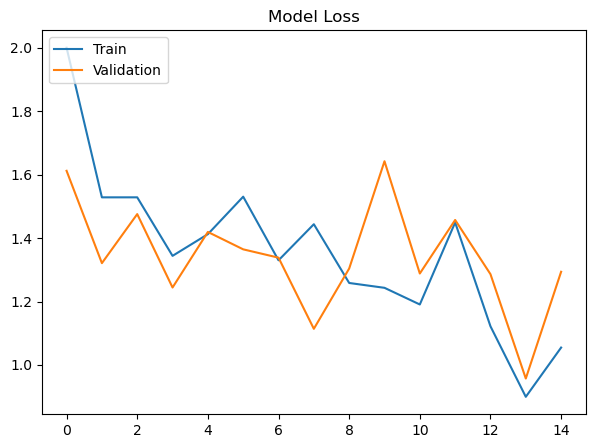

In [12]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.legend(loc='upper left')

# Adjust subplot parameters
plt.subplots_adjust(top=0.9, bottom=0.1, right=0.95, left=0.1, hspace=0.25, wspace=0.35)

plt.show()


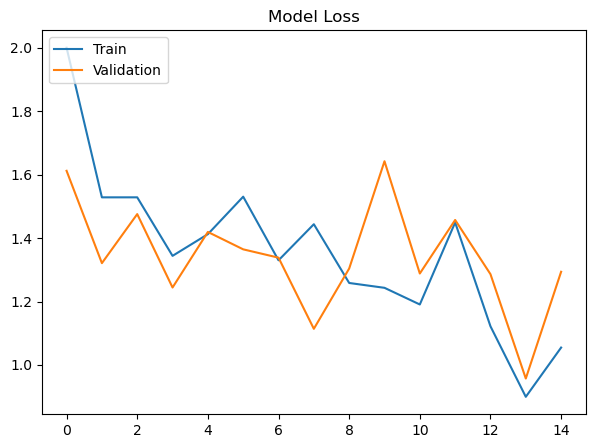

In [13]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.legend(loc='upper left')

# Adjust subplot parameters
plt.subplots_adjust(top=0.9, bottom=0.1, right=0.95, left=0.1, hspace=0.25, wspace=0.35)

plt.show()



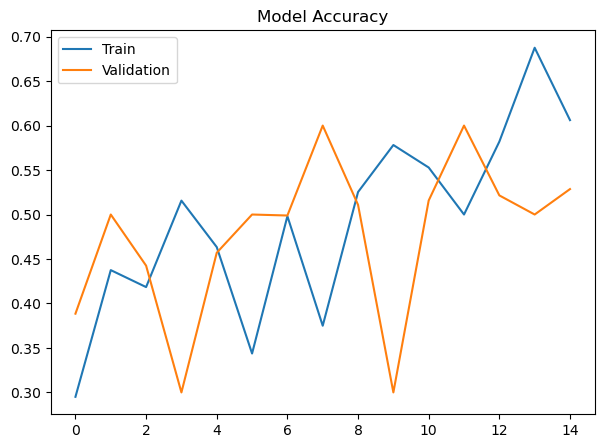

In [14]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.legend(loc='upper left')

# Adjust subplot parameters
plt.subplots_adjust(top=0.9, bottom=0.1, right=0.95, left=0.1, hspace=0.25, wspace=0.35)

plt.show()


**saving the model**


In [17]:
# Save the model architecture to a JSON file
model_json = model.to_json()
with open("model_a.json", "w") as json_file:
    json_file.write(model_json)
